In [5]:
import src
import numpy as np
import torch
from torchvision.transforms import Compose, Lambda, ToPILImage, Resize, ToTensor, CenterCrop
from PIL import Image
import requests
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dhruvsrikanth/Work/Projects/MPCS/Quarter_4/Fundamentals of Deep Learning/Project/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
beta_start = 0.0001
beta_end = 0.02
timesteps = 300
image_size = 32
num_channels = 3
batch_size = 128
dataset_name = 'cifar10'
results_folder_name = './results'
sample_and_save_freq = 100
device = "cuda" if torch.cuda.is_available() else "cpu"
learninig_rate = 1e-3
epochs = 50

In [11]:
# create line plot
def plot_line(x, y, x_label, y_label):
    plt.clf()
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


t_range = [t for t in range(0, timesteps)]


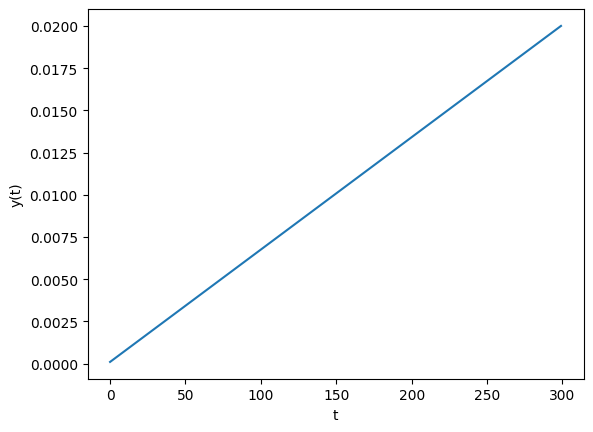

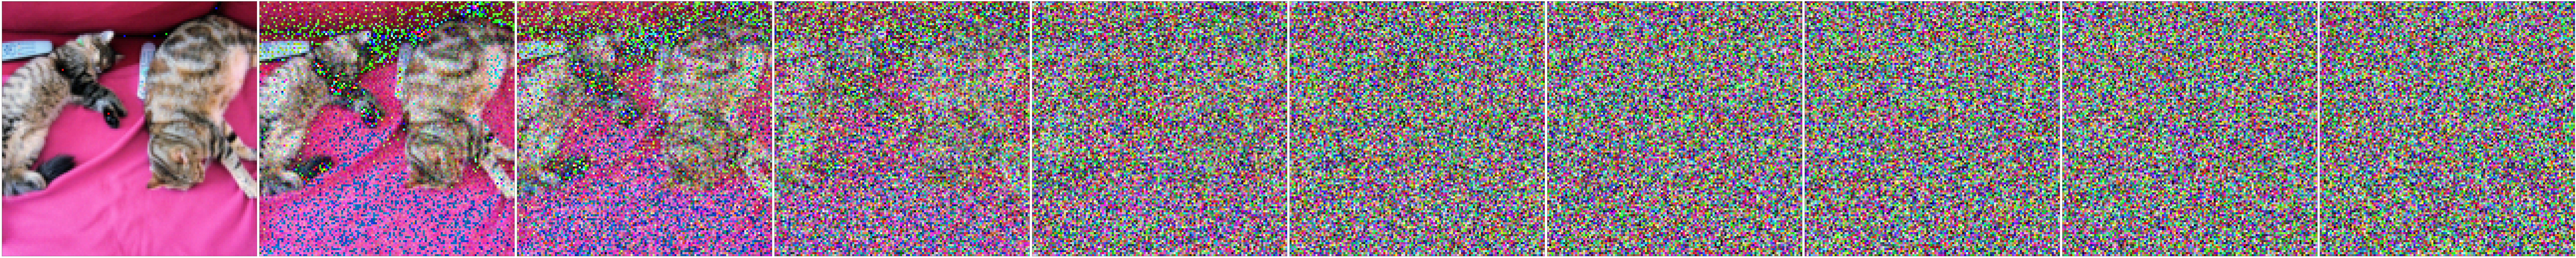

In [12]:
scheduler = src.LinearScheduler(beta_start=beta_start, beta_end=beta_end, timesteps=timesteps)

reverse_transform = Compose([
     Lambda(lambda t: (t + 1) / 2),
     Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
     Lambda(lambda t: t * 255.),
     Lambda(lambda t: t.numpy().astype(np.uint8)),
     ToPILImage(),
])

forward_diffusion = src.ForwardDiffusion(sqrt_alphas_cumprod=scheduler.sqrt_alphas_cumprod, sqrt_one_minus_alphas_cumprod=scheduler.sqrt_one_minus_alphas_cumprod, reverse_transform=reverse_transform)
plot_line(t_range, scheduler.betas, 't', 'y(t)')


url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image_size = 128
transform = Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor(), # turn into Numpy array of shape HWC, divide by 255
    Lambda(lambda t: (t * 2) - 1),
    
])

x_start = transform(image).unsqueeze(0)

src.plot(image=image, imgs=[forward_diffusion.get_noisy_image(x_start=x_start, t=torch.tensor([t])) for t in range(0, timesteps, timesteps // 10)])


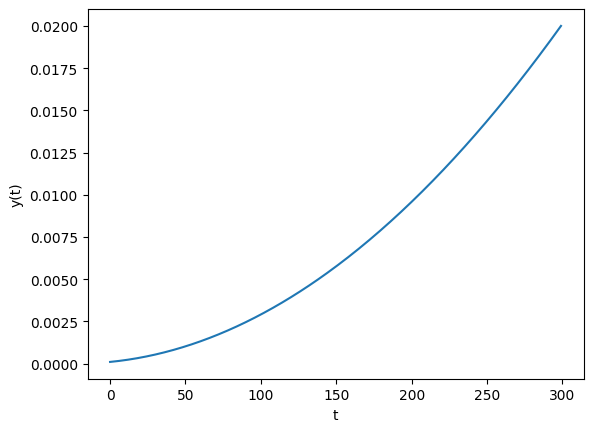

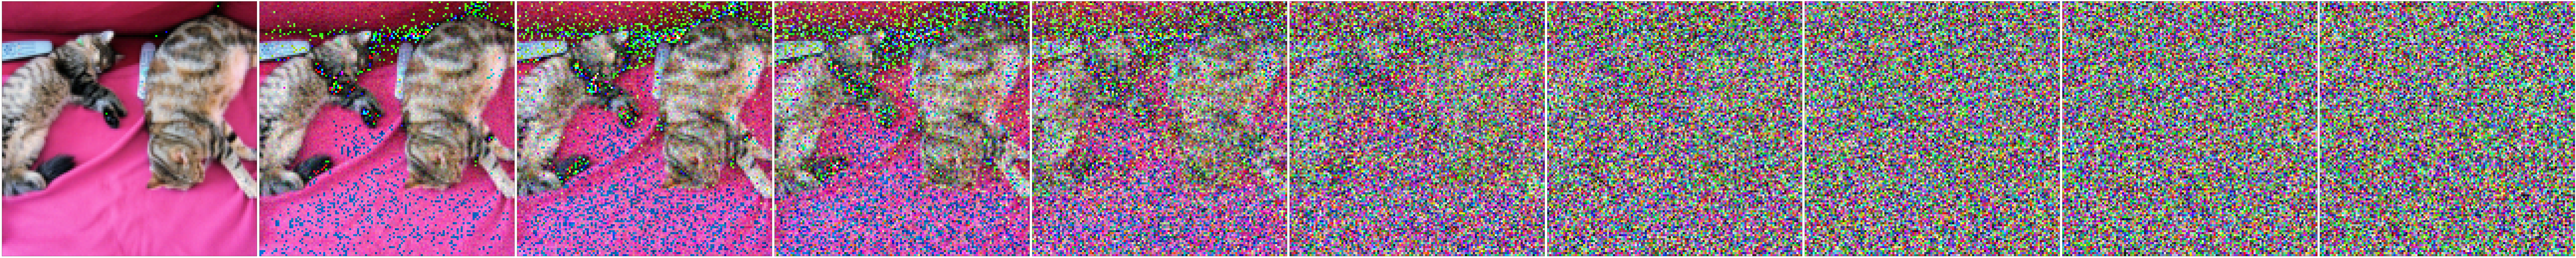

In [13]:
scheduler = src.QuadraticScheduler(beta_start=beta_start, beta_end=beta_end, timesteps=timesteps)

reverse_transform = Compose([
     Lambda(lambda t: (t + 1) / 2),
     Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
     Lambda(lambda t: t * 255.),
     Lambda(lambda t: t.numpy().astype(np.uint8)),
     ToPILImage(),
])

forward_diffusion = src.ForwardDiffusion(sqrt_alphas_cumprod=scheduler.sqrt_alphas_cumprod, sqrt_one_minus_alphas_cumprod=scheduler.sqrt_one_minus_alphas_cumprod, reverse_transform=reverse_transform)
plot_line(t_range, scheduler.betas, 't', 'y(t)')


url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image_size = 128
transform = Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor(), # turn into Numpy array of shape HWC, divide by 255
    Lambda(lambda t: (t * 2) - 1),
    
])

x_start = transform(image).unsqueeze(0)

src.plot(image=image, imgs=[forward_diffusion.get_noisy_image(x_start=x_start, t=torch.tensor([t])) for t in range(0, timesteps, timesteps // 10)])


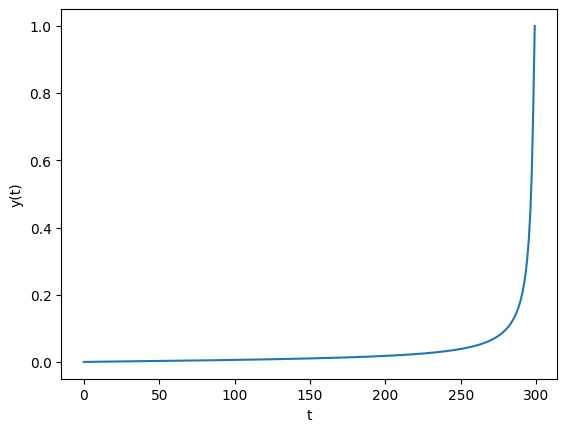

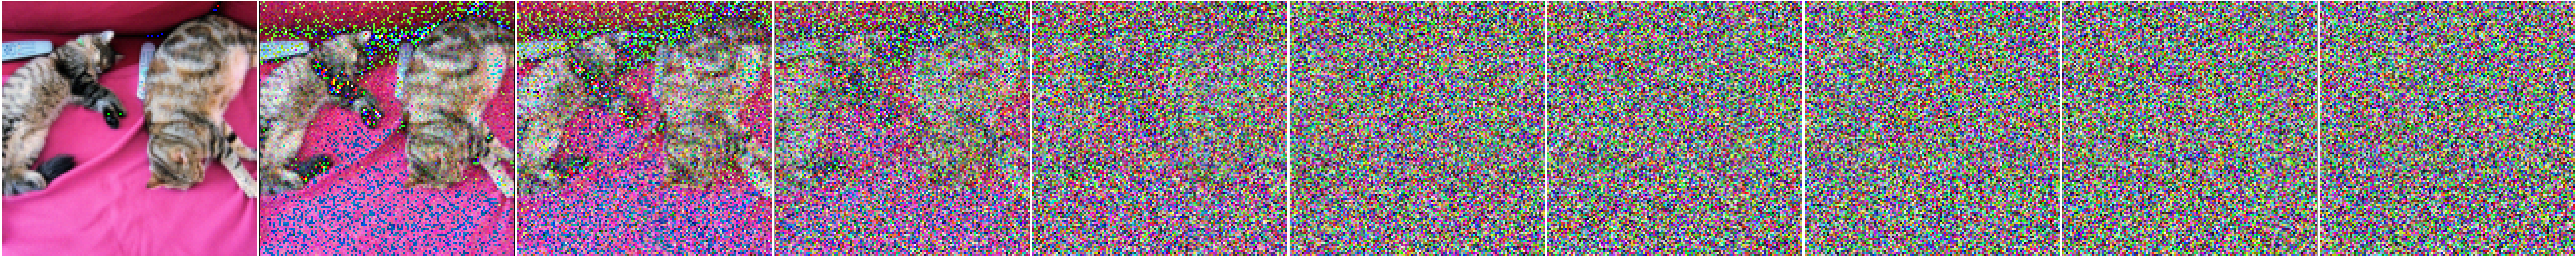

In [14]:
scheduler = src.CosineScheduler(beta_start=beta_start, beta_end=beta_end, timesteps=timesteps)

reverse_transform = Compose([
     Lambda(lambda t: (t + 1) / 2),
     Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
     Lambda(lambda t: t * 255.),
     Lambda(lambda t: t.numpy().astype(np.uint8)),
     ToPILImage(),
])

forward_diffusion = src.ForwardDiffusion(sqrt_alphas_cumprod=scheduler.sqrt_alphas_cumprod, sqrt_one_minus_alphas_cumprod=scheduler.sqrt_one_minus_alphas_cumprod, reverse_transform=reverse_transform)
plot_line(t_range, scheduler.betas, 't', 'y(t)')


url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image_size = 128
transform = Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor(), # turn into Numpy array of shape HWC, divide by 255
    Lambda(lambda t: (t * 2) - 1),
    
])

x_start = transform(image).unsqueeze(0)

src.plot(image=image, imgs=[forward_diffusion.get_noisy_image(x_start=x_start, t=torch.tensor([t])) for t in range(0, timesteps, timesteps // 10)])


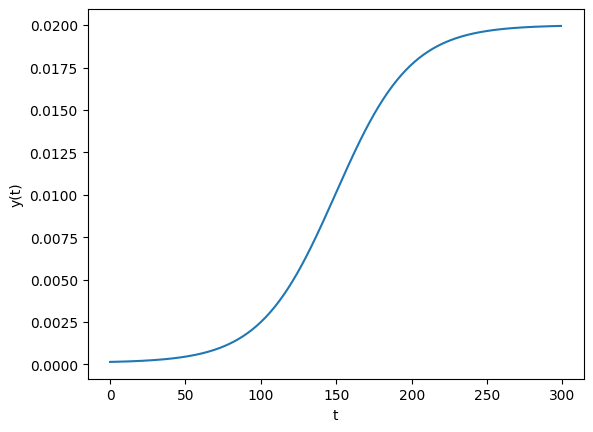

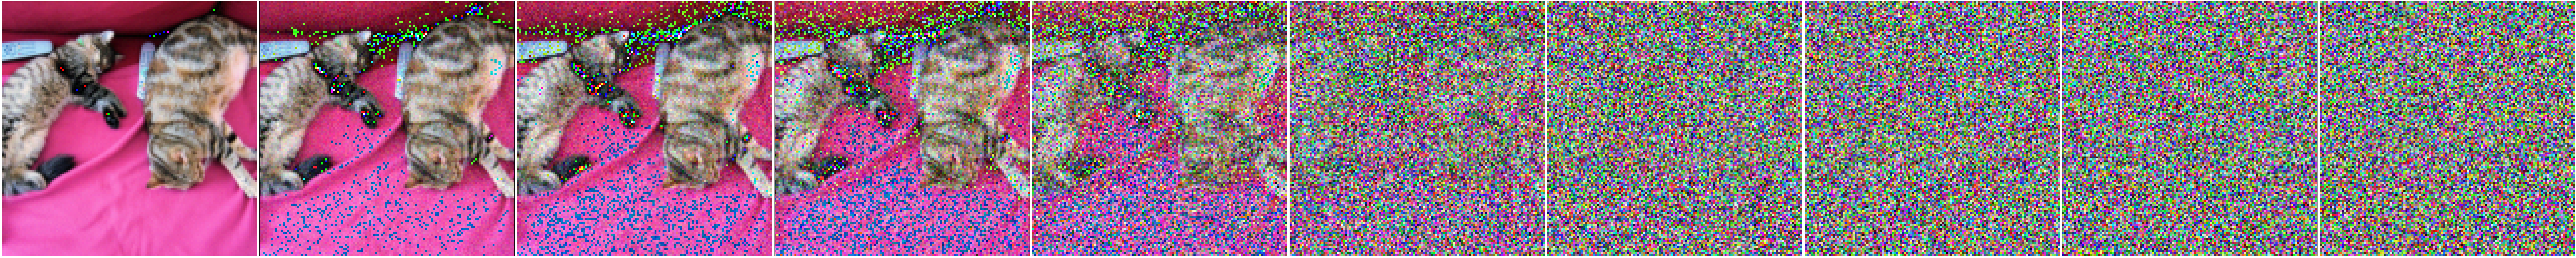

In [15]:
scheduler = src.SigmoidScheduler(beta_start=beta_start, beta_end=beta_end, timesteps=timesteps)

reverse_transform = Compose([
     Lambda(lambda t: (t + 1) / 2),
     Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
     Lambda(lambda t: t * 255.),
     Lambda(lambda t: t.numpy().astype(np.uint8)),
     ToPILImage(),
])

forward_diffusion = src.ForwardDiffusion(sqrt_alphas_cumprod=scheduler.sqrt_alphas_cumprod, sqrt_one_minus_alphas_cumprod=scheduler.sqrt_one_minus_alphas_cumprod, reverse_transform=reverse_transform)
plot_line(t_range, scheduler.betas, 't', 'y(t)')


url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image_size = 128
transform = Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor(), # turn into Numpy array of shape HWC, divide by 255
    Lambda(lambda t: (t * 2) - 1),
    
])

x_start = transform(image).unsqueeze(0)

src.plot(image=image, imgs=[forward_diffusion.get_noisy_image(x_start=x_start, t=torch.tensor([t])) for t in range(0, timesteps, timesteps // 10)])
